In [1]:
## import all libraries needed 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

# Introduction

To get the necessary data needed for our EDA, we first needed a webscraper. The following script below is in R, and we used it to scrape headlines for ESPN and NFl.com.

In [ ]:
#Webscraping historical articles via internetArchive and archiveRetriever package.

```{r, eval=FALSE}
install.packages("archiveRetriever", force = TRUE)
library(archiveRetriever)
```


## archive_overview allows you to check if internetarchive has captures available of a specific webpage for a range of dates. 

```{R}
library(archiveRetriever)


#check if data is available on espn's nfl page for october through december 2017
espn_overview <- archive_overview(homepage = "https://www.espn.com/nfl/",
                     startDate = "2017-10-01",
                     endDate = "2017-12-31")
```



```{r pressure, echo=FALSE}
espn_overview
```
## Once it is known that webpages are available in your desired date range retrieve_urls allows you to collect webarchive urls for each of these days to later use for webscraping. (Webarchive sometimes saves mementos more than once a day but to avoid repeated data this function will ignore multiples for a given day)
```{r}
espn_mementos <- retrieve_urls(homepage = "https://www.espn.com/nfl/",
                     startDate = "2017-10-01",
                     endDate = "2017-10-10")

espn_mementos[1:10]
```
```{r}

#This will show you the sub-pages urls for a given website such as espn.com
espn_links <- retrieve_links(ArchiveUrls = "https://web.archive.org/web/20201003005130/https://www.espn.com/", ignoreErrors = TRUE)

head(espn_links)
```
##This is the main function of archiveRetriever. scrape_urls takes the urls collected earlier with the retrieve urls function then you need to specify the path of the website object you want to take data from (it takes xpaths as the defualt) in this case I gave it a headline object. 
```{r}
espn_headline <- scrape_urls(c(Urls =espn_mementos),
paths <- c(
  headlines = '//*[@id="main-container"]/div/section[3]/div[1]/section/ul/li[1]/a'
  
),

archiveDate = TRUE,

  
  
  
)


```


```{r}
head(espn_headline,10)
```
##notice it doesn't always find anything in the location specified so there are sometimes gaps. But if it misses 10 in a row it will stop so you can fix it.
```{r}
my_df <- as.data.frame(espn_headline)
```
```{r}
View(my_df)
```
```{r}
#write.csv(my_df, "~/R_files\\sample_headlines_espn1.csv", row.names=FALSE)

This allowed us to get a good amount of data shown below:

In [3]:
df = pd.read_csv("sorted_df_w_out_teams.csv")
df

,Urls,headlines,archiveDate,master_term
0,http://web.archive.org/web/20170902013843/http...,Sources: Browns boot Osweiler as part of cuts,2017-09-02,Cleveland Browns
1,http://web.archive.org/web/20170904022536/http...,Bucs deal Wilcox to Steelers after adding Ward,2017-09-04,Tampa Bay Buccaneers
2,http://web.archive.org/web/20170908045356/http...,Patriots' Amendola leaves with head injury,2017-09-08,New England Patriots
3,http://web.archive.org/web/20170913000204/http...,Cards re-sign CJ2K with Johnson out months,2017-09-13,Arizona Cardinals
4,http://web.archive.org/web/20170914001848/http...,Texans' Cushing suspended 10 games for PEDs,2017-09-14,Houston Texans
...,...,...,...,...
4113,http://web.archive.org/web/20220213012900/http...,Sources: Broncos to hire Morgan St. HC Wheatley,2022-02-13,Denver Broncos
4114,http://web.archive.org/web/20220213012900/http...,OBJ hopes to come through for Rams - and Drake,2022-02-13,Los Angeles Rams
4115,http://web.archive.org/web/20220213012900/http...,Dolphins to retain Boyer as defensive coordinator,2022-02-13,Miami Dolphins
4116,http://web.archive.org/web/20220213012900/http...,'Mattress Mack' bets big again on Bengals to win,2022-02-13,Cincinnati Bengals


We then performed sentiment analysis, after cleaning up the NA's and duplicate headlines, by using a pretraind model to obtain a score for the teams per headline as shown below. The sentiment was scored from a -1 to +1 basis, with -1 being negative, and +1 being positive. 

In [4]:
sentiment = pd.read_csv("df_scored_9.csv")
sentiment

,Unnamed: 0,Unnamed: 0.1,archiveDate,Urls,headlines,team,total_score
0,0,19.0,2017-08-20,http://web.archive.org/web/20170820000936/http...,Jags must make QB change; Cutler could have ca...,Jacksonville Jaguars,0.023380
1,1,20.0,2017-08-20,http://web.archive.org/web/20170820000936/http...,How Texans' D has evolved under Crennel Vrabel,Houston Texans,0.848871
2,2,21.0,2017-08-20,http://web.archive.org/web/20170820000936/http...,Cutler's debut proves he's in control of Dolph...,Miami Dolphins,0.996091
3,3,22.0,2017-08-20,http://web.archive.org/web/20170820000936/http...,Raiders' Sean Smith charged with felony assault,Las Vegas Raiders,-0.629718
4,4,23.0,2017-08-20,http://web.archive.org/web/20170820000936/http...,Making sense of the Patriots fantasy RBs,New England Patriots,0.089151
...,...,...,...,...,...,...,...
5365,7041,NaN,2022-02-12,http://web.archive.org/web/20220212034752/http...,Dolphins to retain Boyer as defensive coordinator,Miami Dolphins,0.777284
5366,7042,NaN,2022-02-12,http://web.archive.org/web/20220212034752/http...,'Mattress Mack' bets big again on Bengals to win,Cincinnati Bengals,0.608361
5367,7043,NaN,2022-02-12,http://web.archive.org/web/20220212034752/http...,Fins' McDaniel: 'Extremely proud' to be biracial,Miami Dolphins,0.992159
5368,7044,NaN,2022-02-13,http://web.archive.org/web/20220213012900/http...,Sources: Broncos to hire Morgan St. HC Wheatley,Denver Broncos,0.767140


# Some Simple Data Visualizations for a Sense of the Data

With this data we have obtained, we first made some simple graphs to get a better sense of what we are working with. To do so, we decided to do a quick bar chart of the total_sentiment per year from 2017-2022. Afterwards, we did a linear regression plot for each year, looking at the relationship between the amount of times a team is mentioned and its total sentiment score. 

To do this, since the data was already cleaned from before, all we had to do was work with the data to get the results we wanted. We used groupby to get the total sentiment score per team, and shown below are the results

In [6]:
## create a copy for simplicity
sentiment_df = sentiment.copy()
## turn into datetime for easier sorting of years
sentiment_df['archiveDate']= pd.to_datetime(sentiment_df['archiveDate'])
## also drop unnecceary columns
sentiment_drop = sentiment_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

In [7]:
## scores per team by year
## 2017
start_date = '2017-1-01'
end_date = '2017-12-31'

mask = (sentiment_drop['archiveDate'] >= start_date) & (sentiment_drop['archiveDate'] <= end_date)
sentiment_2017 = sentiment_drop.loc[mask]

## 2018
start_date1 = '2018-1-01'
end_date1 = '2018-12-31'

mask1 = (sentiment_drop['archiveDate'] >= start_date1) & (sentiment_drop['archiveDate'] <= end_date1)
sentiment_2018 = sentiment_drop.loc[mask1]

## 2019
start_date2 = '2019-1-01'
end_date2 = '2019-12-31'

mask2 = (sentiment_drop['archiveDate'] >= start_date2) & (sentiment_drop['archiveDate'] <= end_date2)
sentiment_2019 = sentiment_drop.loc[mask2]

## 2020
start_date3 = '2020-1-01'
end_date3 = '2020-12-31'

mask3 = (sentiment_drop['archiveDate'] >= start_date3) & (sentiment_drop['archiveDate'] <= end_date3)
sentiment_2020 = sentiment_drop.loc[mask3]

## 2021
start_date4 = '2021-1-01'
end_date4 = '2021-12-31'

mask4 = (sentiment_drop['archiveDate'] >= start_date4) & (sentiment_drop['archiveDate'] <= end_date4)
sentiment_2021 = sentiment_drop.loc[mask4]

## 2022
start_date5 = '2022-1-01'
end_date5 = '2022-12-31'

mask5 = (sentiment_drop['archiveDate'] >= start_date5) & (sentiment_drop['archiveDate'] <= end_date5)
sentiment_2022 = sentiment_drop.loc[mask5]

In [8]:
## group by team to get overall score
sentiment_group_2017 = sentiment_2017.groupby('team').sum()
sentiment_group_2018 = sentiment_2018.groupby('team').sum()
sentiment_group_2019 = sentiment_2019.groupby('team').sum()
sentiment_group_2020 = sentiment_2020.groupby('team').sum()
sentiment_group_2021 = sentiment_2021.groupby('team').sum()
sentiment_group_2022 = sentiment_2022.groupby('team').sum()

## Total Sentiment Score for All NFL Teams

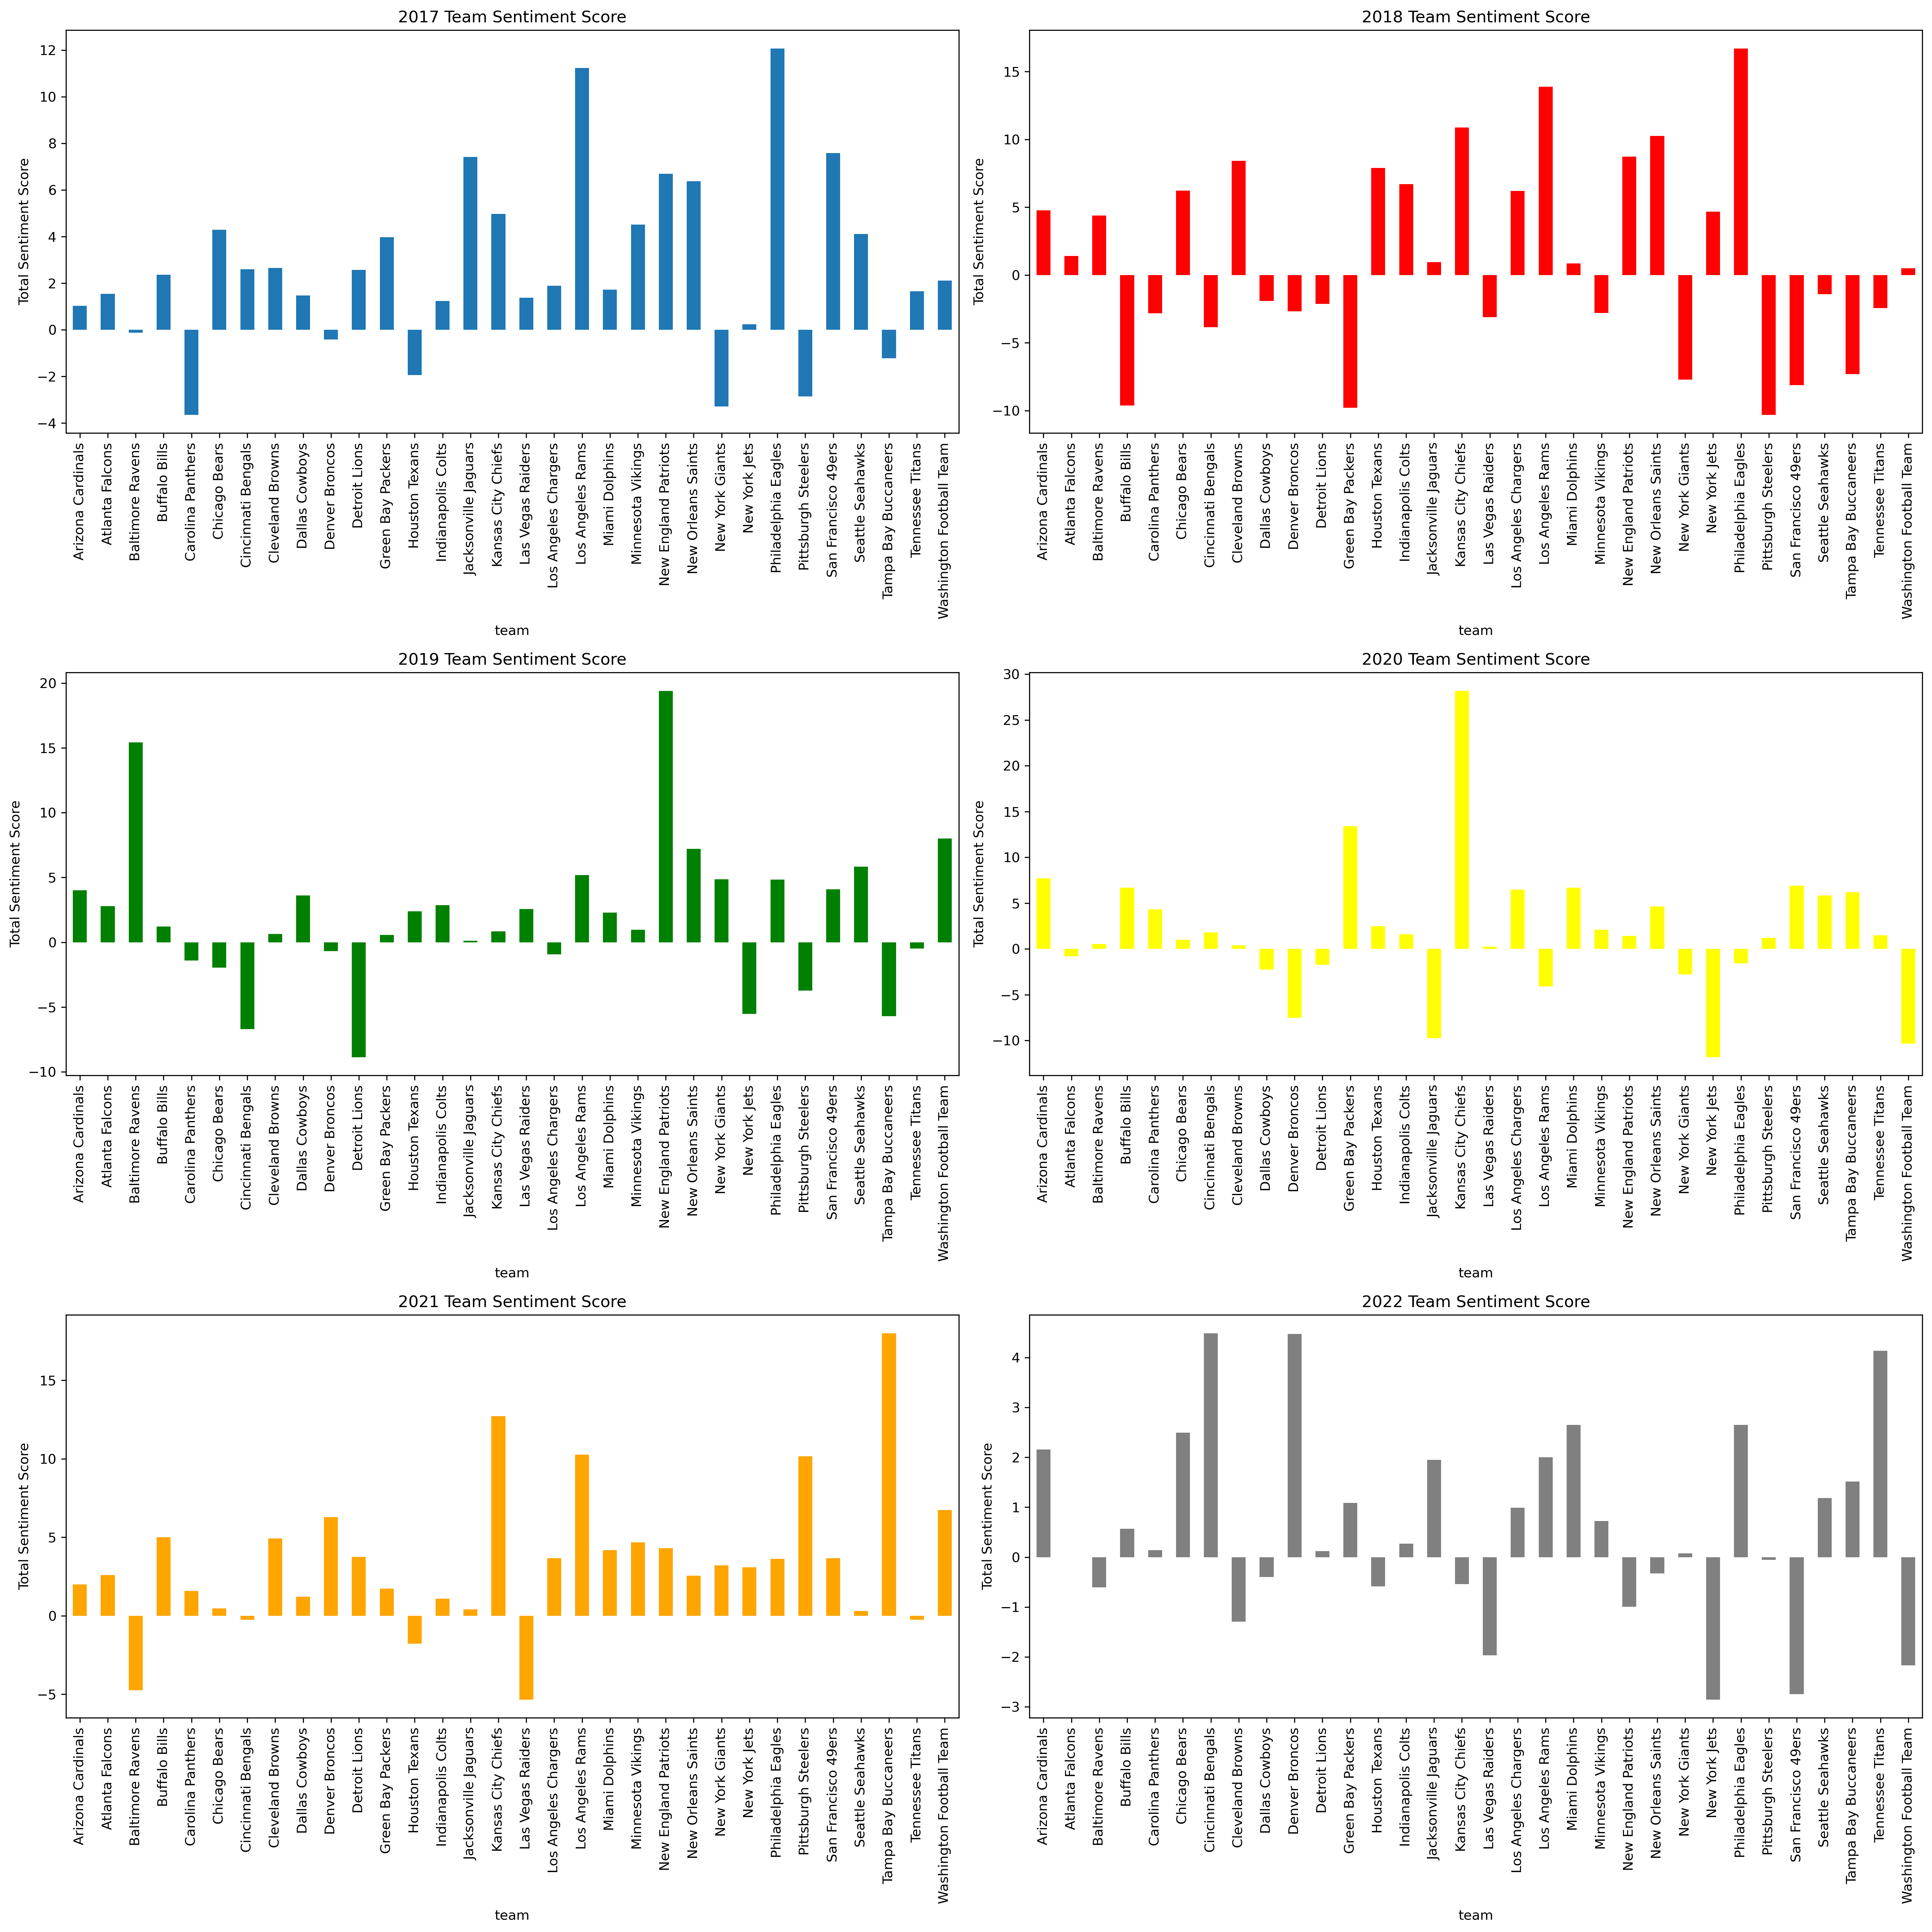

In [12]:
## team by sentiment score - totalled

fig, axs = plt.subplots(3, 2, figsize = (20,20), dpi = 300)

## 2017
sentiment_group_2017.plot.bar(ax = axs[0,0], title = '2017 Team Sentiment Score', ylabel = 'Total Sentiment Score', 
                              legend = False)

## 2018
sentiment_group_2018.plot.bar(ax = axs[0,1], title = '2018 Team Sentiment Score', ylabel = 'Total Sentiment Score', 
                             color = 'red', legend = False)

## 2019
sentiment_group_2019.plot.bar(ax = axs[1,0], title = '2019 Team Sentiment Score', ylabel = 'Total Sentiment Score', 
                              color = 'green' , legend = False)

## 2020
sentiment_group_2020.plot.bar(ax = axs[1,1], title = '2020 Team Sentiment Score', ylabel = 'Total Sentiment Score', 
                              color = 'yellow' , legend = False)

## 2021
sentiment_group_2021.plot.bar(ax = axs[2,0], title = '2021 Team Sentiment Score', ylabel = 'Total Sentiment Score', 
                              color = 'orange' , legend = False)

## 2022
sentiment_group_2022.plot.bar(ax = axs[2,1],  title = '2022 Team Sentiment Score', ylabel = 'Total Sentiment Score', 
                              color = 'grey' , legend = False)

plt.tight_layout()

As you can see from these simple bar charts, some teams had overwhelmeingly more positive sentiment headlines than other teams in a year. Some teams also had lots of negative headlines in some years. However, this might not be a comprehensive look at the overall sentiment as some teams may be mentioned more than others. This is why we also decided to look at the amount of times a team is mentioned and count those up to obtain deeper insight into what is really going on, and then do a simple linear regression to see if there is a relationship there.

# Sentiment Score and the Amount of Times Mentioned

Here, we got the counts of the number of times a team is mentioned in a given year, and combined it with the total sentiment score to get a better view. These bar plots give a better sense of what is going on, as we can see the sentiment score per times mentioned below:

In [13]:
## copies of everything just in case
sentiment_group_2017_copy = sentiment_group_2017.copy()
sentiment_group_2018_copy = sentiment_group_2018.copy()
sentiment_group_2019_copy = sentiment_group_2019.copy()
sentiment_group_2020_copy = sentiment_group_2020.copy()
sentiment_group_2021_copy = sentiment_group_2021.copy()
sentiment_group_2022_copy = sentiment_group_2022.copy()

In [14]:
## counts per year
count_2017 = sentiment_2017['team'].value_counts(sort = False)
count_2018 = sentiment_2018['team'].value_counts(sort = False)
count_2019 = sentiment_2019['team'].value_counts(sort = False)
count_2020 = sentiment_2020['team'].value_counts(sort = False)
count_2021 = sentiment_2021['team'].value_counts(sort = False)
count_2022 = sentiment_2022['team'].value_counts(sort = False)

In [15]:
## add the counts in 
sentiment_group_2017_copy['counts'] = count_2017.reindex(sentiment_group_2017_copy.index)
sentiment_group_2018_copy['counts'] = count_2018.reindex(sentiment_group_2018_copy.index)
sentiment_group_2019_copy['counts'] = count_2019.reindex(sentiment_group_2019_copy.index)
sentiment_group_2020_copy['counts'] = count_2020.reindex(sentiment_group_2020_copy.index)
sentiment_group_2021_copy['counts'] = count_2021.reindex(sentiment_group_2021_copy.index)
sentiment_group_2022_copy['counts'] = count_2022.reindex(sentiment_group_2022_copy.index)

In [20]:
## get a more comprehensive look 
sentiment_group_2017_copy['sentiment_per_count'] = sentiment_group_2017_copy['total_score'] / sentiment_group_2017_copy['counts']
sentiment_group_2018_copy['sentiment_per_count'] = sentiment_group_2018_copy['total_score'] / sentiment_group_2018_copy['counts']
sentiment_group_2019_copy['sentiment_per_count'] = sentiment_group_2019_copy['total_score'] / sentiment_group_2019_copy['counts']
sentiment_group_2020_copy['sentiment_per_count'] = sentiment_group_2020_copy['total_score'] / sentiment_group_2020_copy['counts']
sentiment_group_2021_copy['sentiment_per_count'] = sentiment_group_2021_copy['total_score'] / sentiment_group_2021_copy['counts']
sentiment_group_2022_copy['sentiment_per_count'] = sentiment_group_2022_copy['total_score'] / sentiment_group_2022_copy['counts']

In [27]:
## drop for simplicity 
sentiment_group_2017_copy_drop = sentiment_group_2017_copy.drop(['total_score', 'counts'], axis = 1)
sentiment_group_2018_copy_drop = sentiment_group_2018_copy.drop(['total_score', 'counts'], axis = 1)
sentiment_group_2019_copy_drop = sentiment_group_2019_copy.drop(['total_score', 'counts'], axis = 1)
sentiment_group_2020_copy_drop = sentiment_group_2020_copy.drop(['total_score', 'counts'], axis = 1)
sentiment_group_2021_copy_drop = sentiment_group_2021_copy.drop(['total_score', 'counts'], axis = 1)
sentiment_group_2022_copy_drop = sentiment_group_2022_copy.drop(['total_score', 'counts'], axis = 1)

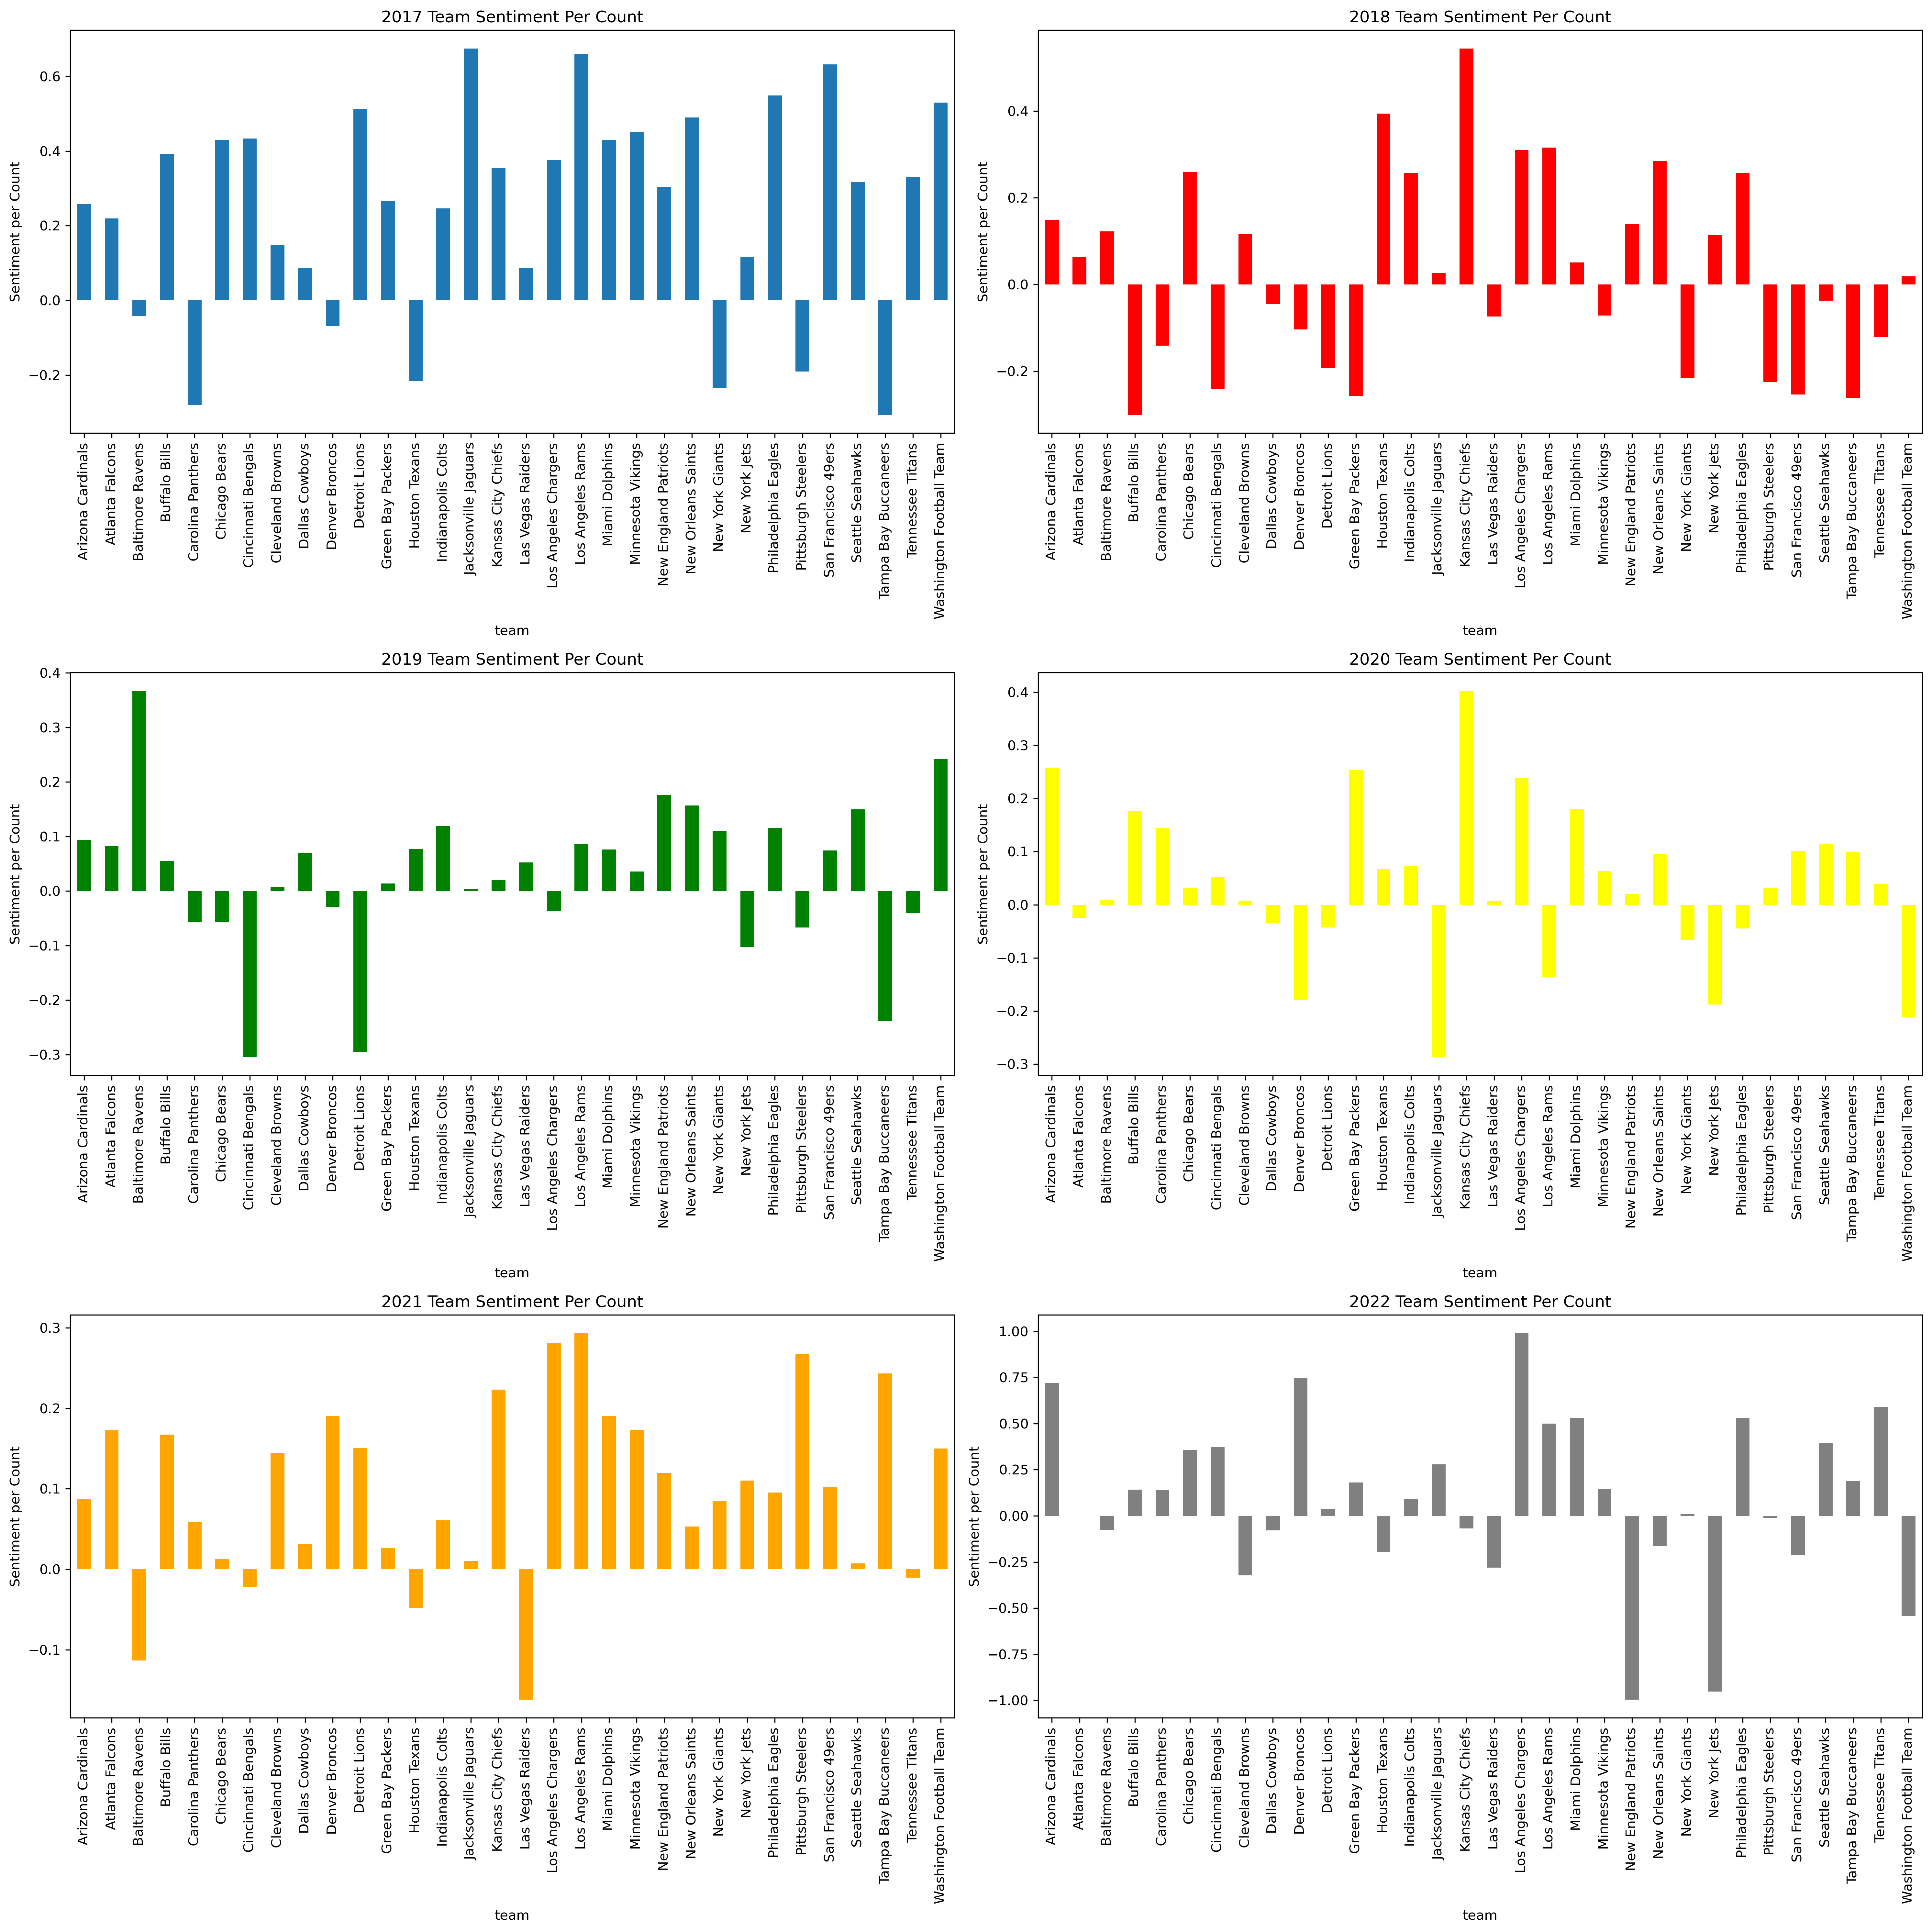

In [29]:
## team by sentiment score per count

fig, axs = plt.subplots(3, 2, figsize = (20,20), dpi = 300)

## 2017
sentiment_group_2017_copy_drop.plot.bar(ax = axs[0,0], title = '2017 Team Sentiment Per Count', ylabel = 'Sentiment per Count', 
                              legend = False)

## 2018
sentiment_group_2018_copy_drop.plot.bar(ax = axs[0,1], title = '2018 Team Sentiment Per Count', ylabel = 'Sentiment per Count', 
                             color = 'red', legend = False)

## 2019
sentiment_group_2019_copy_drop.plot.bar(ax = axs[1,0], title = '2019 Team Sentiment Per Count', ylabel = 'Sentiment per Count', 
                              color = 'green' , legend = False)

## 2020
sentiment_group_2020_copy_drop.plot.bar(ax = axs[1,1], title = '2020 Team Sentiment Per Count', ylabel = 'Sentiment per Count', 
                              color = 'yellow' , legend = False)

## 2021
sentiment_group_2021_copy_drop.plot.bar(ax = axs[2,0], title = '2021 Team Sentiment Per Count', ylabel = 'Sentiment per Count', 
                              color = 'orange' , legend = False)

## 2022
sentiment_group_2022_copy_drop.plot.bar(ax = axs[2,1],  title = '2022 Team Sentiment Per Count', ylabel = 'Sentiment per Count', 
                              color = 'grey' , legend = False)

plt.tight_layout()

As you can see, this gives us a better sense of the sentiment per count mentioned.

# Linear Regression Analyis for Times Mentioned and Total Sentiment

Finally, we did a simple linear regression to see if there's a relationship between the counts and the sentiment. Below is what we obtained

In [30]:
## 2017 linear regression
X = sentiment_group_2017_copy['counts'].to_numpy().reshape(-1,1)
y = sentiment_group_2017_copy['total_score'].to_numpy()

model = LinearRegression().fit(X,y)
y_pred = model.predict(X)

## 2018
X1 = sentiment_group_2018_copy['counts'].to_numpy().reshape(-1,1)
y1 = sentiment_group_2018_copy['total_score'].to_numpy()

model1 = LinearRegression().fit(X1,y1)
y_pred1 = model1.predict(X1)

## 2019
X2 = sentiment_group_2019_copy['counts'].to_numpy().reshape(-1,1)
y2 = sentiment_group_2019_copy['total_score'].to_numpy()

model2 = LinearRegression().fit(X2,y2)
y_pred2 = model2.predict(X2)

## 2020
X3 = sentiment_group_2020_copy['counts'].to_numpy().reshape(-1,1)
y3 = sentiment_group_2020_copy['total_score'].to_numpy()

model3 = LinearRegression().fit(X3,y3)
y_pred3 = model3.predict(X3)

## 2021
X4 = sentiment_group_2021_copy['counts'].to_numpy().reshape(-1,1)
y4 = sentiment_group_2021_copy['total_score'].to_numpy()

model4 = LinearRegression().fit(X4,y4)
y_pred4 = model4.predict(X4)

## 2022
X5 = sentiment_group_2022_copy['counts'].to_numpy().reshape(-1,1)
y5 = sentiment_group_2022_copy['total_score'].to_numpy()

model5 = LinearRegression().fit(X5,y5)
y_pred5 = model5.predict(X5)

In [31]:
## linear regression between count of headlines and sentiment

print(model.coef_, model.intercept_)
print(model1.coef_, model1.intercept_)
print(model2.coef_, model2.intercept_)
print(model3.coef_, model3.intercept_)
print(model4.coef_, model4.intercept_)
print(model5.coef_, model5.intercept_)

[0.29631096] -0.3977914935507494
[0.13635089] -3.3823093116820386
[0.15178281] -4.162598552390166
[0.10628616] -2.846476677003344
[0.14537824] -1.5948071560355617
[0.10422961] 0.06727617279846598


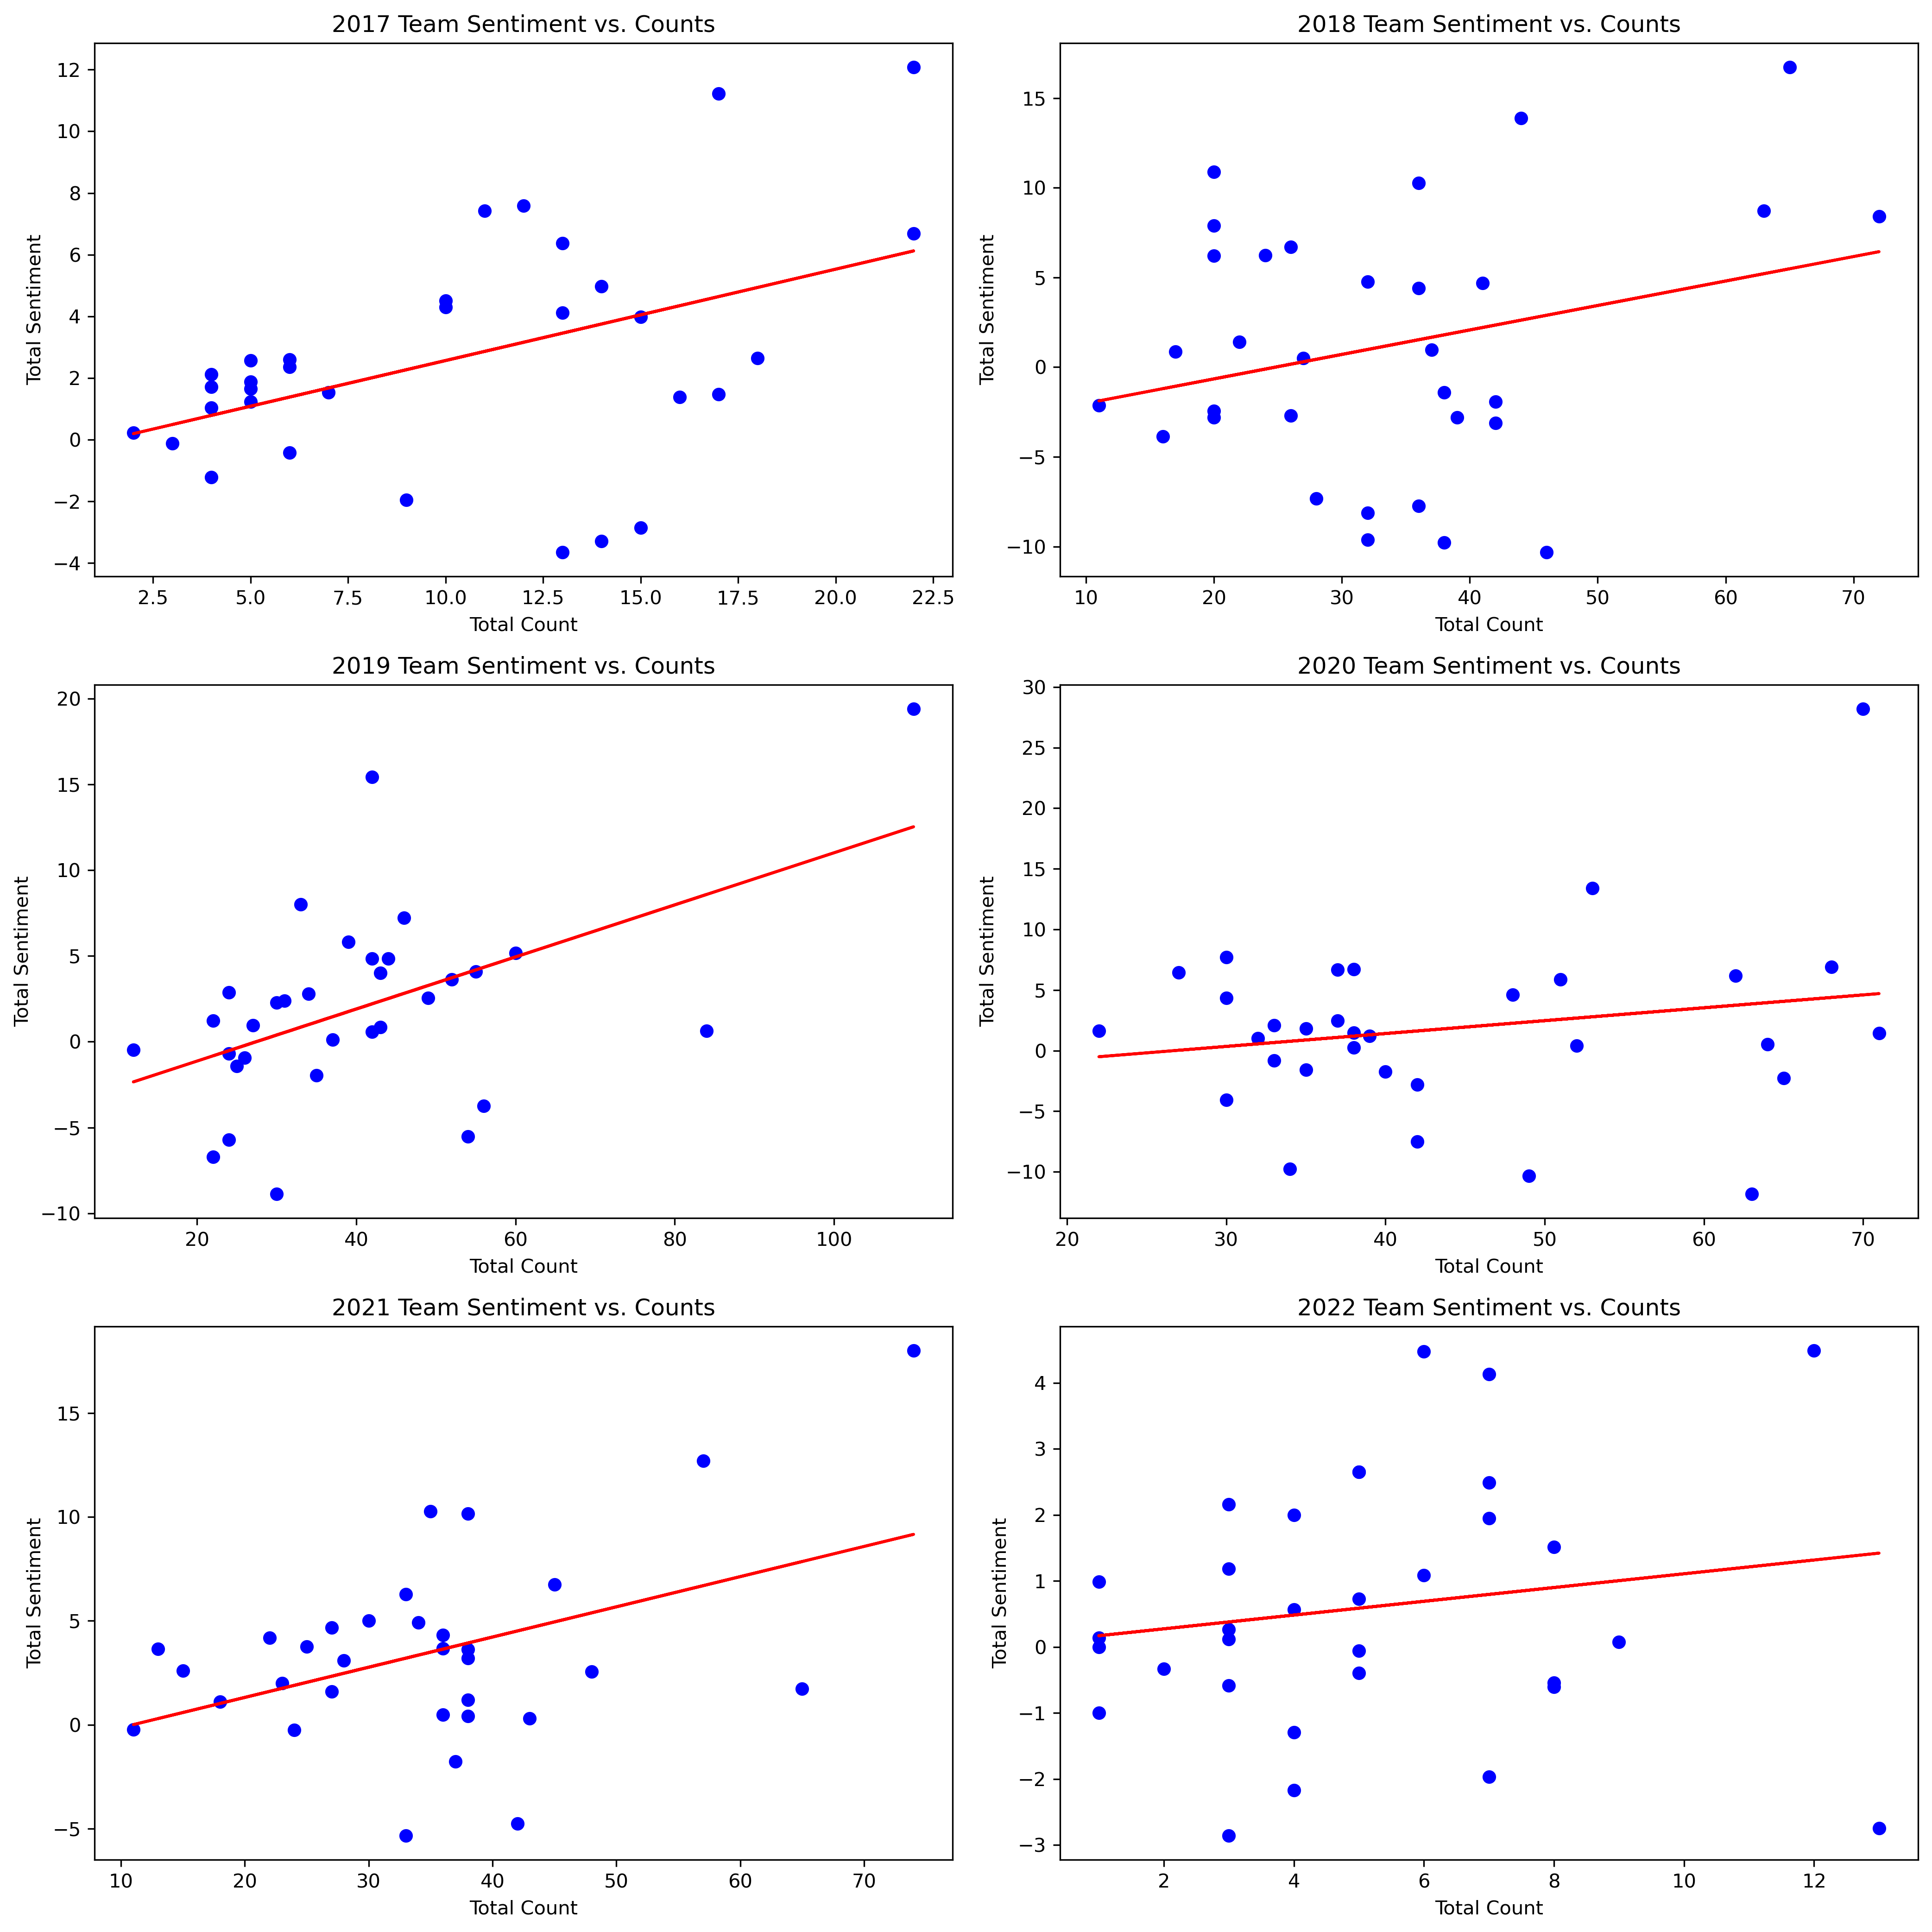

In [32]:
## linear regression analysis
fig, axs = plt.subplots(3, 2, figsize = (14,14), dpi = 300)

## 2017
axs[0,0].scatter(X, y, color = 'blue')
axs[0,0].plot(X, y_pred, color = 'red')
axs[0,0].set_title("2017 Team Sentiment vs. Counts")
axs[0,0].set_xlabel("Total Count")
axs[0,0].set_ylabel("Total Sentiment")

## 2018
axs[0,1].scatter(X1, y1, color = 'blue')
axs[0,1].plot(X1, y_pred1, color = 'red')
axs[0,1].set_title("2018 Team Sentiment vs. Counts")
axs[0,1].set_xlabel("Total Count")
axs[0,1].set_ylabel("Total Sentiment")

## 2019
axs[1,0].scatter(X2, y2, color = 'blue')
axs[1,0].plot(X2, y_pred2, color = 'red')
axs[1,0].set_title("2019 Team Sentiment vs. Counts")
axs[1,0].set_xlabel("Total Count")
axs[1,0].set_ylabel("Total Sentiment")

## 2020
axs[1,1].scatter(X3, y3, color = 'blue')
axs[1,1].plot(X3, y_pred3, color = 'red')
axs[1,1].set_title("2020 Team Sentiment vs. Counts")
axs[1,1].set_xlabel("Total Count")
axs[1,1].set_ylabel("Total Sentiment")

## 2021
axs[2,0].scatter(X4, y4, color = 'blue')
axs[2,0].plot(X4, y_pred4, color = 'red')
axs[2,0].set_title("2021 Team Sentiment vs. Counts")
axs[2,0].set_xlabel("Total Count")
axs[2,0].set_ylabel("Total Sentiment")

## 2022
axs[2,1].scatter(X5, y5, color = 'blue')
axs[2,1].plot(X5, y_pred5, color = 'red')
axs[2,1].set_title("2022 Team Sentiment vs. Counts")
axs[2,1].set_xlabel("Total Count")
axs[2,1].set_ylabel("Total Sentiment")

plt.tight_layout()

As you can see, there seems to be a positive relationship between the amount of times a team is mentioned and its total sentiment, but no definite conclusion can be given as you can see how variable and scattered the plots are. 